In [12]:
import tensorflow as tf
import sklearn.metrics
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
import numpy as np
from os import path

In [13]:
gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
else:
    print("No GPUs detected!")

1 Physical GPUs, 1 Logical GPUs


In [14]:
image_generator = ImageDataGenerator()

In [15]:
input_dir = "lettersDataset_final"

In [16]:
size = (50, 50)

In [17]:
train_generator = image_generator.flow_from_directory(path.join(input_dir, "train"), target_size=size, class_mode="sparse")

Found 243282 images belonging to 36 classes.


In [19]:
test_generator = image_generator.flow_from_directory(path.join(input_dir, "test"), target_size=size, class_mode="sparse", shuffle=False)

Found 60806 images belonging to 36 classes.


In [20]:
from model import make_model
w,h = size
model = make_model((w, h, 3))

In [21]:
checkpoint_path="checkpoints\\chk1"

In [22]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    monitor="val_accuracy",
    mode="max",
    save_best_only=True
)

In [18]:
history = model.fit(train_generator, validation_data=test_generator, callbacks=[checkpoint_callback], epochs=10)

Epoch 1/10
7603/7603 [==============================] - 4666s 614ms/step - loss: 0.5881 - accuracy: 0.8887 - val_loss: 0.4447 - val_accuracy: 0.9220
Epoch 2/10
7603/7603 [==============================] - 808s 106ms/step - loss: 0.3907 - accuracy: 0.9293 - val_loss: 0.4287 - val_accuracy: 0.9248
Epoch 3/10
7603/7603 [==============================] - 509s 67ms/step - loss: 0.3110 - accuracy: 0.9398 - val_loss: 0.4257 - val_accuracy: 0.9280
Epoch 4/10
7603/7603 [==============================] - 529s 70ms/step - loss: 0.2320 - accuracy: 0.9494 - val_loss: 0.4938 - val_accuracy: 0.9197
Epoch 5/10
7603/7603 [==============================] - 478s 63ms/step - loss: 0.1639 - accuracy: 0.9603 - val_loss: 0.5416 - val_accuracy: 0.9152
Epoch 6/10
7603/7603 [==============================] - 469s 62ms/step - loss: 0.1215 - accuracy: 0.9678 - val_loss: 0.7381 - val_accuracy: 0.9125
Epoch 7/10
7603/7603 [==============================] - 978s 129ms/step - loss: 0.0978 - accuracy: 0.9733 - val_los

In [23]:
model.evaluate(test_generator)

1901/1901 [==============================] - 24s 13ms/step - loss: 3.7354 - accuracy: 0.0261


[3.7353947162628174, 0.026148734614253044]

In [24]:
latest = tf.train.latest_checkpoint(path.dirname(checkpoint_path))

In [25]:
model.load_weights(latest)

In [26]:
model.evaluate(test_generator)

1901/1901 [==============================] - 22s 11ms/step - loss: 0.4257 - accuracy: 0.9280


[0.4256618916988373, 0.9280005097389221]

In [27]:
model.save(checkpoint_path)

In [28]:
testPredictions = model.predict(test_generator)

In [29]:
testPredictions.shape

(60806, 36)

In [30]:
classes = np.array(range(0, 36)).repeat(60806).reshape(testPredictions.shape)

In [31]:
confusion = sklearn.metrics.confusion_matrix(np.argmax(testPredictions, axis=1), test_generator.classes)

In [32]:
import seaborn
import pandas as pd
from matplotlib import pyplot as plt

<AxesSubplot:>

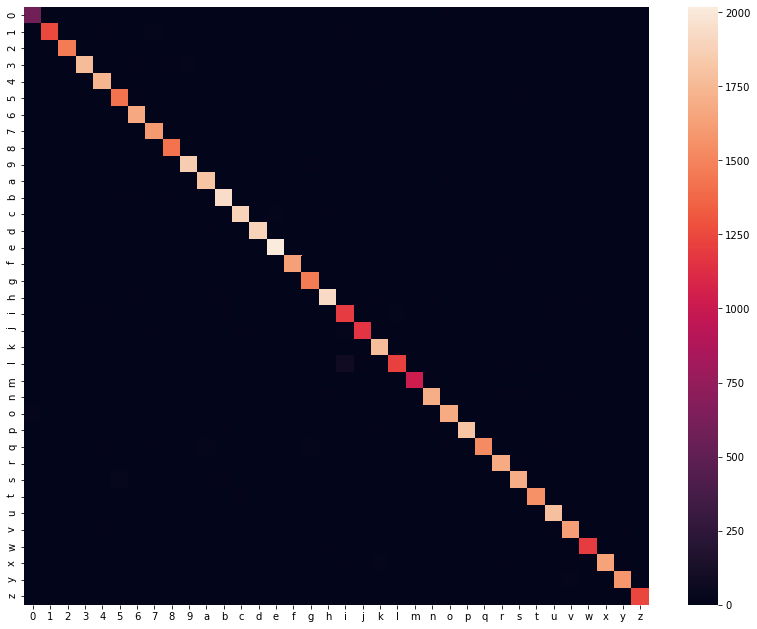

In [33]:
labels = list(test_generator.class_indices.keys())
plt.figure(figsize = (14,11))
seaborn.heatmap(pd.DataFrame(confusion, index = labels, columns = labels))